<a href="https://colab.research.google.com/github/AlphaRareZ/Android-Sharing-App/blob/main/LFD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")

In [19]:
epochs = int(input("Enter Number of Epochs"))

Enter Number of Epochs5


In [4]:
# Convert categorical variables to numeric
categorical_columns = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [5]:
# Separate features and target
target = 'G3'  # Final grade as the target variable
X = data.drop(columns=[target])

# Binarize the target variable
y = (data[target] >= 10).astype(int)  # 1 if G3 >= 10, else 0


In [6]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Step 3: Define Neural Network Model
def create_nn_model():
    model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [24]:
# Step 4: Define SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

In [25]:
# Step 5: Perform 10-Fold Cross Validation
kf = KFold(n_splits=epochs, shuffle=True, random_state=42)
nn_errors, svm_errors = [], []
roc_nn, roc_svm = [], []

In [26]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Neural Network
    nn_model = create_nn_model()
    nn_model.fit(X_train, y_train, epochs=epochs, verbose=0)
    nn_preds = nn_model.predict(X_test)

    # Neural Network Error
    nn_error = np.mean((y_test - nn_preds.flatten())**2)
    nn_errors.append(nn_error)

    # Train SVM
    svm_model.fit(X_train, y_train)
    svm_preds = svm_model.predict(X_test)

    # SVM Error
    svm_error = np.mean((y_test - svm_preds)**2)
    svm_errors.append(svm_error)

    # ROC Curves
    fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_preds.flatten())
    fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
    roc_nn.append((fpr_nn, tpr_nn))
    roc_svm.append((fpr_svm, tpr_svm))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


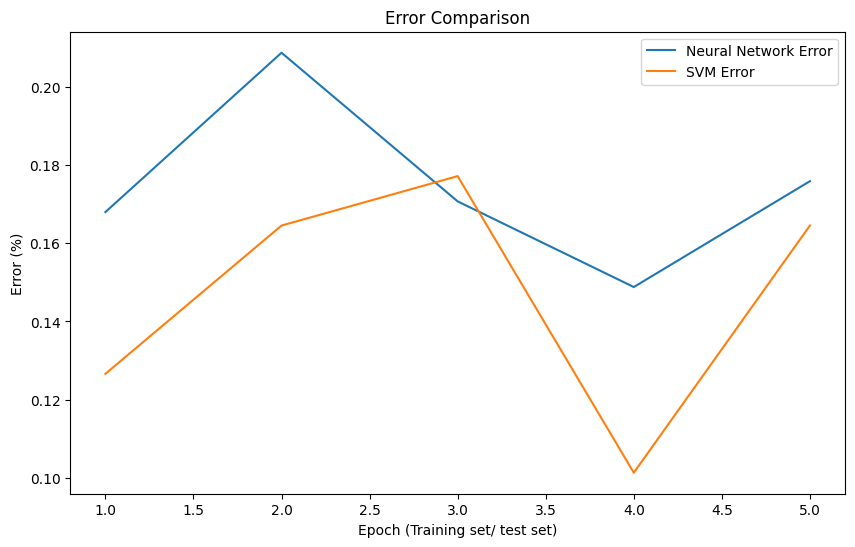

In [29]:
# Step 6: Results Analysis
# Error Plot
eepochs = range(1, 6)
plt.figure(figsize=(10, 6))
plt.plot(eepochs, nn_errors, label='Neural Network Error')
plt.plot(eepochs, svm_errors, label='SVM Error')
plt.xlabel("Epoch (Training set/ test set)")
plt.ylabel("Error (%)")
plt.legend()
plt.title("Error Comparison")
plt.show()

In [30]:
# Confusion Matrix and Classification Report
print("Confusion Matrix for SVM")
print(confusion_matrix(y_test, svm_preds))
print("Classification Report for SVM")
print(classification_report(y_test, svm_preds))

Confusion Matrix for SVM
[[16 11]
 [ 2 50]]
Classification Report for SVM
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        27
           1       0.82      0.96      0.88        52

    accuracy                           0.84        79
   macro avg       0.85      0.78      0.80        79
weighted avg       0.84      0.84      0.83        79



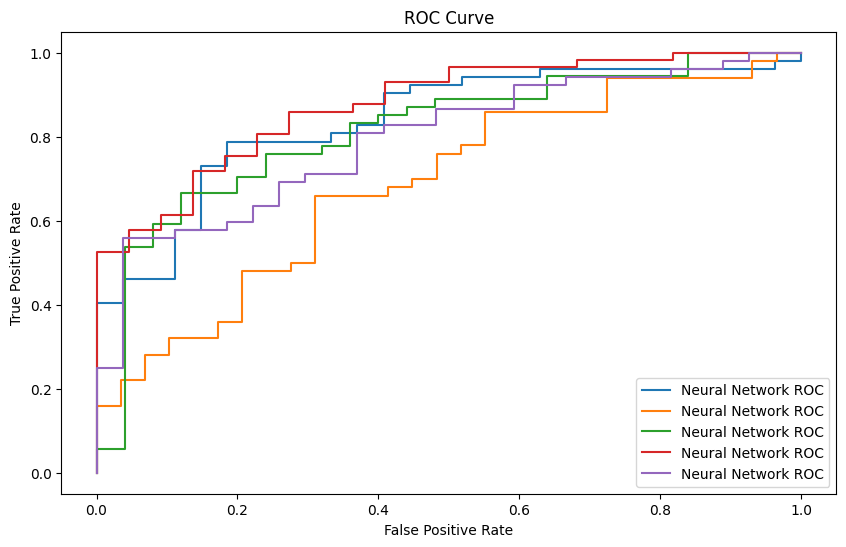

In [33]:
# ROC Curve Plot
plt.figure(figsize=(10, 6))
for fpr, tpr in roc_nn:
    plt.plot(fpr, tpr, label='Neural Network ROC')
# for fpr, tpr in roc_svm:
#     plt.plot(fpr, tpr, label='SVM ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

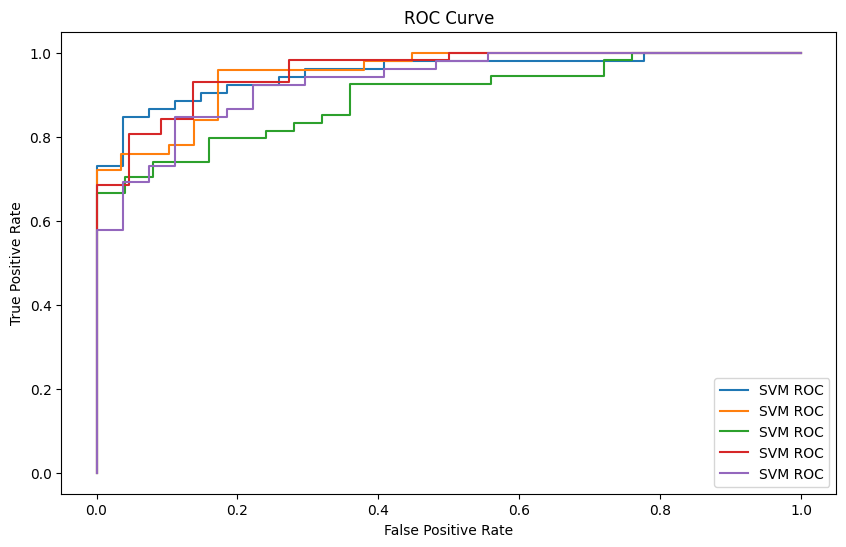

In [32]:
# ROC Curve Plot
plt.figure(figsize=(10, 6))
for fpr, tpr in roc_svm:
    plt.plot(fpr, tpr, label='SVM ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [34]:
# Step 7: Summary
print("Neural Network Mean Error:", np.mean(nn_errors))
print("SVM Mean Error:", np.mean(svm_errors))

if np.mean(nn_errors) < np.mean(svm_errors):
    print("Recommendation: Use Neural Network for prediction.")
else:
    print("Recommendation: Use SVM for prediction.")

Neural Network Mean Error: 0.1744598931697871
SVM Mean Error: 0.1468354430379747
Recommendation: Use SVM for prediction.
